     NumberOfClaims,"TotalPayment"
108                          392.5
19                            46.2
13                            15.7
124                          422.2
40                           119.4
..                             ...
9                             87.4
31                           209.8
14                            95.5
53                           244.6
26                           187.5

[63 rows x 1 columns]


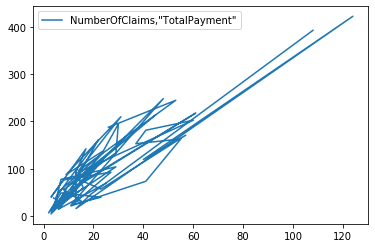

In [3]:
#Write integral

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "C:\\Users\\User\\Downloads\\data2.csv"
df = pd.read_csv(path)
print(df)
df.plot();

Построение графика по точкам из exel.